In [ ]:
import keras
import numpy as np
import pandas as pd
import random
import matplotlib.pyplot as plt
from numpy import asarray
import os
import csv
from sklearn.model_selection import train_test_split
import tensorflow as tf
from string import ascii_uppercase
from tqdm import tqdm, trange, tqdm_notebook
from time import sleep
import cv2, skimage
from skimage.transform import resize
from sklearn.model_selection import StratifiedKFold
from keras.layers import Input
from keras import Model
from tensorflow import keras
from tensorflow.keras import layers

## Label Conversion

In [ ]:
labels = {x: y for y, x in enumerate(ascii_uppercase)}
labels['del'] = 26
labels['nothing'] = 27
labels['space'] = 28
print(labels)

train_len = 29000
img_size = 64
train_dir = "../input/cs412-spring-2021/train_data/train/"
target_dims = (64,64,3) 

{'A': 0, 'B': 1, 'C': 2, 'D': 3, 'E': 4, 'F': 5, 'G': 6, 'H': 7, 'I': 8, 'J': 9, 'K': 10, 'L': 11, 'M': 12, 'N': 13, 'O': 14, 'P': 15, 'Q': 16, 'R': 17, 'S': 18, 'T': 19, 'U': 20, 'V': 21, 'W': 22, 'X': 23, 'Y': 24, 'Z': 25, 'del': 26, 'nothing': 27, 'space': 28}


## Reading Training Set

In [ ]:
from skimage import data
from skimage.viewer import ImageViewer
def read_training_datasetGray(train_dir):
    counter = 0
    
    X = np.empty((train_len, img_size, img_size, 3), dtype=np.float32)
    y = np.empty ((train_len), dtype = np.int)
    
    folders = sorted(os.listdir(train_dir))
    for folder in tqdm(folders):
        if not folder.startswith('.'):
            if folder in labels:
                label = labels[folder]
                print(label)
            else:
                label = 29
            for image_name in os.listdir(train_dir + folder):
                image = cv2.imread(train_dir+folder+'/'+image_name)
                #image = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

                if image is not None:
                    image = skimage.transform.resize(image, (img_size, img_size, 3))
                    image_array = np.asarray(image).reshape((-1, img_size, img_size, 3))
                    X[counter] = image_array
                    y[counter] = label
                    counter += 1
        sleep(0.1)
    return X, y

/opt/conda/lib/python3.7/site-packages/skimage/viewer/utils/__init__.py:1: UserWarning: Recommended matplotlib backend is `Agg` for full skimage.viewer functionality.
  from .core import *


In [ ]:
X_trainn, y_trainn = read_training_datasetGray(train_dir)

  0%|          | 0/29 [00:00<?, ?it/s]

0


  3%|▎         | 1/29 [00:16<07:53, 16.90s/it]

1


  7%|▋         | 2/29 [00:33<07:37, 16.94s/it]

2


 10%|█         | 3/29 [00:50<07:14, 16.71s/it]

3


 14%|█▍        | 4/29 [01:07<06:59, 16.78s/it]

4


 17%|█▋        | 5/29 [01:23<06:40, 16.68s/it]

5


 21%|██        | 6/29 [01:40<06:25, 16.77s/it]

6


 24%|██▍       | 7/29 [01:57<06:06, 16.64s/it]

7


 28%|██▊       | 8/29 [02:13<05:50, 16.71s/it]

8


 31%|███       | 9/29 [02:30<05:31, 16.57s/it]

9


 34%|███▍      | 10/29 [02:48<05:24, 17.06s/it]

10


 38%|███▊      | 11/29 [03:04<05:01, 16.77s/it]

11


 41%|████▏     | 12/29 [03:20<04:42, 16.61s/it]

12


 45%|████▍     | 13/29 [03:37<04:25, 16.57s/it]

13


 48%|████▊     | 14/29 [03:53<04:06, 16.46s/it]

14


 52%|█████▏    | 15/29 [04:09<03:49, 16.38s/it]

15


 55%|█████▌    | 16/29 [04:26<03:34, 16.53s/it]

16


 59%|█████▊    | 17/29 [04:43<03:19, 16.60s/it]

17


 62%|██████▏   | 18/29 [05:00<03:03, 16.69s/it]

18


 66%|██████▌   | 19/29 [05:17<02:47, 16.77s/it]

19


 69%|██████▉   | 20/29 [05:33<02:31, 16.82s/it]

20


 72%|███████▏  | 21/29 [05:51<02:15, 16.94s/it]

21


 76%|███████▌  | 22/29 [06:08<01:59, 17.09s/it]

22


 79%|███████▉  | 23/29 [06:25<01:42, 17.10s/it]

23


 83%|████████▎ | 24/29 [06:42<01:24, 16.95s/it]

24


 86%|████████▌ | 25/29 [06:58<01:07, 16.85s/it]

25


 90%|████████▉ | 26/29 [07:15<00:50, 16.78s/it]

26


 93%|█████████▎| 27/29 [07:32<00:33, 16.76s/it]

27


 97%|█████████▋| 28/29 [07:49<00:16, 16.75s/it]

28


100%|██████████| 29/29 [08:06<00:00, 16.78s/it]


## Suffling Training Data 

In [ ]:
#shuffle the data
idx = np.random.permutation(len(X_trainn))
X_trainn , y_trainn = X_trainn[idx], y_trainn[idx]

## Train-Validation Split

In [ ]:
X_train,X_val,y_train,y_val = train_test_split(X_trainn,y_trainn,test_size=0.2,random_state=22, stratify = y_trainn)

y_train = keras.utils.to_categorical(y_train ,29)
y_val = keras.utils.to_categorical(y_val ,29)

In [ ]:
print("X_train shape:" , X_train.shape)

print("y_train shape:", y_train.shape)

print("X_val shape:", X_val.shape)

X_train shape: (23200, 64, 64, 3)
y_train shape: (23200, 29)
X_val shape: (5800, 64, 64, 3)


## Data Augmentation (Rotating, Zoom, etc)

In [ ]:
batch_size = 32
train_image_generator = tf.keras.preprocessing.image.ImageDataGenerator(
                            shear_range=0.1,
                            #featurewise_std_normalization=False,  # divide inputs by std of the dataset
                            samplewise_center=True,                       
                            samplewise_std_normalization=True,  # divide each input by its std
                            zca_whitening=False,  # apply ZCA whitening
                            rotation_range=10,  # randomly rotate images in the range (degrees, 0 to 180)
                            zoom_range = 0.1, # Randomly zoom image 
                            width_shift_range=0.1,  # randomly shift images horizontally (fraction of total width)
                            height_shift_range=0.1,  # randomly shift images vertically (fraction of total height)
                            horizontal_flip=False,  # randomly flip images
                            vertical_flip=False)  # randomly flip images

val_image_generator = tf.keras.preprocessing.image.ImageDataGenerator(
    samplewise_center=True,
    samplewise_std_normalization=True,
)

train_generator = train_image_generator.flow(x=X_train, y=y_train, batch_size=batch_size, shuffle=True)
val_generator = val_image_generator.flow(x=X_val, y=y_val, batch_size=batch_size, shuffle=False)

## Reading Test Set

In [ ]:
def read_test_dataset(test_dir):
    counter = 0
    X = np.empty((test_len, img_size, img_size, 3), dtype=np.float32)
    arr = []
    for j in tqdm_notebook(range(1), desc= "reading test"):
     
        for image_name in os.listdir(test_dir):
            if image_name.split('.')[-1] == 'jpg':
                #print(image_name)
                image = cv2.imread(test_dir+'/'+image_name)
                #image = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
                #print(image)
                image = skimage.transform.resize(image, (img_size, img_size, 3))
                image_array = np.asarray(image).reshape((-1, img_size, img_size, 3))

                X[counter] = image_array
                counter += 1
                arr.append(image_name.split('.')[0])
    sleep(0.1)
    return X, arr

In [ ]:
test_dir = "../input/cs412-spring-2021/nonlabeled-test2/"
test_len = 14500
X_test, ids = read_test_dataset(test_dir)
print(X_test.shape)

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:5: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  """


reading test:   0%|          | 0/1 [00:00<?, ?it/s]

(14500, 64, 64, 3)


In [ ]:
test_image_generator = tf.keras.preprocessing.image.ImageDataGenerator(
    samplewise_center=True,
    samplewise_std_normalization=True,
)

test_generator = test_image_generator.flow(x=X_test, batch_size=batch_size, shuffle=False)

# **Machine Learning**

# Hyperband

In [ ]:
import kerastuner
from kerastuner import HyperModel

class CNNHyperModel(HyperModel):
    def __init__(self, input_shape, num_classes):
        self.input_shape = input_shape
        self.num_classes = num_classes

    def build(self, hp):
        model = keras.Sequential()
        model.add(
            Conv2D(
                filters=16,
                kernel_size=3,
                activation="relu",
                input_shape=self.input_shape,
            )
        )
        model.add(Conv2D(filters=16, activation="relu", kernel_size=3))
        model.add(MaxPooling2D(pool_size=2))
        model.add(
            Dropout(
                rate=hp.Float(
                    "dropout_1", min_value=0.0, max_value=0.5, default=0.25, step=0.05,
                )
            )
        )
        model.add(Conv2D(filters=32, kernel_size=3, activation="relu"))
        model.add(
            Conv2D(
                filters=hp.Choice("num_filters", values=[32, 64], default=64,),
                activation="relu",
                kernel_size=3,
            )
        )
        model.add(MaxPooling2D(pool_size=2))
        model.add(
            Dropout(
                rate=hp.Float(
                    "dropout_2", min_value=0.0, max_value=0.5, default=0.25, step=0.05,
                )
            )
        )
        model.add(Flatten())
        model.add(
            Dense(
                units=hp.Int(
                    "units", min_value=32, max_value=512, step=32, default=128
                ),
                activation=hp.Choice(
                    "dense_activation",
                    values=["relu", "tanh", "sigmoid"],
                    default="relu",
                ),
            )
        )
        model.add(
            Dropout(
                rate=hp.Float(
                    "dropout_3", min_value=0.0, max_value=0.5, default=0.25, step=0.05
                )
            )
        )
        model.add(Dense(self.num_classes, activation="softmax"))

        model.compile(
            optimizer=keras.optimizers.Adam(
                hp.Float(
                    "learning_rate",
                    min_value=1e-4,
                    max_value=1e-2,
                    sampling="LOG",
                    default=1e-3,
                )
            ),
            loss="sparse_categorical_crossentropy",
            metrics=["accuracy"],
        )
        return model


HYPERBAND_MAX_EPOCHS = 40
MAX_TRIALS = 20
EXECUTION_PER_TRIAL = 2

hypermodel = CNNHyperModel(input_shape=target_dims, num_classes=29)

tuner = kerastuner.tuners.hyperband.Hyperband(
    hypermodel,
    max_epochs=HYPERBAND_MAX_EPOCHS,
    objective='val_accuracy',
    executions_per_trial=EXECUTION_PER_TRIAL,
)

'from tensorflow import keras\nimport kerastuner\nfrom kerastuner import HyperModel\n\nclass CNNHyperModel(HyperModel):\n    def __init__(self, input_shape, num_classes):\n        self.input_shape = input_shape\n        self.num_classes = num_classes\n\n    def build(self, hp):\n        model = keras.Sequential()\n        model.add(\n            Conv2D(\n                filters=16,\n                kernel_size=3,\n                activation="relu",\n                input_shape=self.input_shape,\n            )\n        )\n        model.add(Conv2D(filters=16, activation="relu", kernel_size=3))\n        model.add(MaxPooling2D(pool_size=2))\n        model.add(\n            Dropout(\n                rate=hp.Float(\n                    "dropout_1", min_value=0.0, max_value=0.5, default=0.25, step=0.05,\n                )\n            )\n        )\n        model.add(Conv2D(filters=32, kernel_size=3, activation="relu"))\n        model.add(\n            Conv2D(\n                filters=hp.Choic

In [ ]:
#tuner.search_space_summary()

In [ ]:
#N_EPOCH_SEARCH = 40
#tuner.search(X_train, y_train, epochs=N_EPOCH_SEARCH, validation_data=(X_val, y_val))

In [ ]:
# Show a summary of the search
#tuner.results_summary()

In [ ]:
# Retrieve the best model
#best_model = tuner.get_best_models(num_models=1)[0]

Created a model with the hyperparameters that Hyperband provided.

In [ ]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.layers import Conv2D
from keras.layers.convolutional import MaxPooling2D
from keras.layers import Flatten
from keras.layers import Dense


best_model =  keras.Sequential()
best_model.add(
    Conv2D(
        filters=16,
        kernel_size=3,
        activation="relu",
        input_shape=target_dims,
    )
)
best_model.add(Conv2D(filters=16, activation="relu", kernel_size=3))
best_model.add(MaxPooling2D(pool_size=2))
best_model.add(
    tf.keras.layers.Dropout(
        rate=0.05
        )
    )
best_model.add(Conv2D(filters=32, kernel_size=3, activation="relu"))
best_model.add(
    Conv2D(
        filters=64,
        activation="relu",
        kernel_size=3,
    )
)
best_model.add(MaxPooling2D(pool_size=2))
best_model.add(
    tf.keras.layers.Dropout(
        rate=0.2,
        )
    )
best_model.add(Flatten())
best_model.add(
    Dense(
        units=384,
        activation="relu"
        ),
    )
best_model.add(
    tf.keras.layers.Dropout(
        rate=0.25
    )
)
best_model.add(Dense(29, activation="softmax"))

In [ ]:
best_model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 62, 62, 16)        448       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 60, 60, 16)        2320      
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 30, 30, 16)        0         
_________________________________________________________________
dropout (Dropout)            (None, 30, 30, 16)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 28, 28, 32)        4640      
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 26, 26, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 13, 13, 64)        0

In [ ]:
from keras.callbacks import EarlyStopping 

best_model.compile(
    optimizer=keras.optimizers.Adam(learning_rate=
        0.000854),
    loss="categorical_crossentropy",
    metrics=["accuracy"])

best_history = best_model.fit(train_generator.x, train_generator.y, epochs=40, validation_data=(val_generator.x, val_generator.y), initial_epoch=14, callbacks=EarlyStopping(monitor='val_loss',verbose=1))

Epoch 15/40
725/725 [==============================] - 17s 16ms/step - loss: 2.3727 - accuracy: 0.3122 - val_loss: 0.4721 - val_accuracy: 0.8462
Epoch 16/40
725/725 [==============================] - 11s 15ms/step - loss: 0.4690 - accuracy: 0.8468 - val_loss: 0.2230 - val_accuracy: 0.9284
Epoch 17/40
725/725 [==============================] - 11s 15ms/step - loss: 0.2237 - accuracy: 0.9245 - val_loss: 0.1357 - val_accuracy: 0.9550
Epoch 18/40
725/725 [==============================] - 11s 15ms/step - loss: 0.1352 - accuracy: 0.9549 - val_loss: 0.0891 - val_accuracy: 0.9728
Epoch 19/40
725/725 [==============================] - 11s 15ms/step - loss: 0.0995 - accuracy: 0.9668 - val_loss: 0.0725 - val_accuracy: 0.9753
Epoch 20/40
725/725 [==============================] - 10s 14ms/step - loss: 0.0778 - accuracy: 0.9742 - val_loss: 0.0754 - val_accuracy: 0.9762
Epoch 00020: early stopping


In [ ]:
h= pd.DataFrame(best_history.history) 

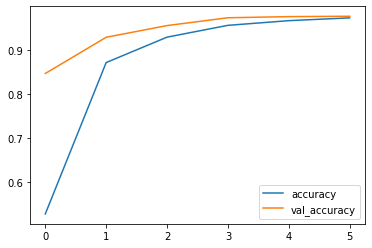

In [ ]:
#Plot train & validation loss
from matplotlib import pyplot
import matplotlib.pyplot as plt

h[["accuracy", "val_accuracy"]].plot()
plt.show()

Get the best 5 models and apply majority voting among them.

In [ ]:
best_model = tuner.get_best_models(num_models=1)[0]
best_model1 = tuner.get_best_models(num_models=2)[1]
best_model2 = tuner.get_best_models(num_models=3)[2]
best_model3 = tuner.get_best_models(num_models=4)[3]
best_model4 = tuner.get_best_models(num_models=5)[4]
predicts = []
y_pred = best_model.predict(X_test)
ypred = np.argmax(y_pred, axis = 1)
predicts.append(ypred)

y_pred = best_model1.predict(X_test)
ypred = np.argmax(y_pred, axis = 1)
predicts.append(ypred)

y_pred = best_model2.predict(X_test)
ypred = np.argmax(y_pred, axis = 1)
predicts.append(ypred)

y_pred = best_model3.predict(X_test)
ypred = np.argmax(y_pred, axis = 1)
predicts.append(ypred)

y_pred = best_model4.predict(X_test)
ypred = np.argmax(y_pred, axis = 1)
predicts.append(ypred)
import operator

last_predict = []

for i in range(7250):
    d = {}

    for j in range(5):
        if predicts[j][i] in d :
            d[predicts[j][i]] += 1
        else:
            d[predicts[j][i]] = 1



    l = max(d.items(), key=operator.itemgetter(1))[0] 
    last_predict.append(l)



print(last_predict)

# Transfer Learning

In [ ]:
model_vgg19 = tf.keras.applications.VGG19(
    include_top=False,
    weights="imagenet",
    input_tensor=None,
    input_shape=target_dims,
    pooling=None,
    classes=29,
    classifier_activation="softmax",
)

model_vgg19.summary()

80142336/80134624 [==============================] - 1s 0us/step
Model: "vgg19"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 64, 64, 3)]       0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 64, 64, 64)        1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 64, 64, 64)        36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 32, 32, 64)        0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 32, 32, 128)       73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 32, 32, 128)       147584    
______________________________________________________________

In [ ]:
for layer in model_vgg19.layers[:-5]:
   layer.trainable = False

In [ ]:
from tensorflow import keras
from tensorflow.keras import layers
img_shape = train_generator.x.shape[1:] #32,32,3
num_classes = train_generator.y.shape[1]


#Create your own input format
keras_input = Input(shape=img_shape, name = 'image_input')

#Use the generated model 
output_vgg = model_vgg19(keras_input)

# Add the fully-connected layers 
My_Vgg = layers.Flatten(name='flatten')(output_vgg)
My_Vgg = layers.Dense(256, activation='relu', name='fc1')(My_Vgg)
My_Vgg = layers.Dense(64, activation='relu', name='fc2')(My_Vgg)
My_Vgg = layers.Dense(29, activation='softmax', name='predictions')(My_Vgg)

callback = tf.keras.callbacks.EarlyStopping(monitor='loss', patience=3)

#Create your own model 
transfer_model = Model(inputs=keras_input, outputs=My_Vgg)
transfer_model.compile(loss='categorical_crossentropy', optimizer='sgd', metrics=['accuracy'])

# Train the model
import datetime
start_time = datetime.datetime.now().strftime('%Y_%m_%d_%H_%M_%S')

transfer_history = transfer_model.fit(train_generator.x, train_generator.y, batch_size=batch_size, callbacks= tf.keras.callbacks.ReduceLROnPlateau(monitor='val_acc', factor=0.2, patience=5, verbose=1, mode='auto'), epochs=15, validation_data=(val_generator.x, val_generator.y))


Epoch 1/15
725/725 [==============================] - 344s 472ms/step - loss: 1.8795 - accuracy: 0.4623 - val_loss: 0.2171 - val_accuracy: 0.9228
Epoch 2/15
725/725 [==============================] - 341s 470ms/step - loss: 0.1867 - accuracy: 0.9427 - val_loss: 0.0642 - val_accuracy: 0.9778
Epoch 3/15
725/725 [==============================] - 341s 470ms/step - loss: 0.0587 - accuracy: 0.9824 - val_loss: 0.4592 - val_accuracy: 0.8498
Epoch 4/15
725/725 [==============================] - 341s 470ms/step - loss: 0.1001 - accuracy: 0.9720 - val_loss: 0.0723 - val_accuracy: 0.9743
Epoch 5/15
725/725 [==============================] - 341s 470ms/step - loss: 0.0242 - accuracy: 0.9924 - val_loss: 0.0134 - val_accuracy: 0.9969
Epoch 6/15
725/725 [==============================] - 341s 470ms/step - loss: 0.0139 - accuracy: 0.9969 - val_loss: 0.0110 - val_accuracy: 0.9967
Epoch 7/15
725/725 [==============================] - 341s 470ms/step - loss: 0.0063 - accuracy: 0.9984 - val_loss: 0.0087 -

In [ ]:
h= pd.DataFrame(transfer_history.history) 

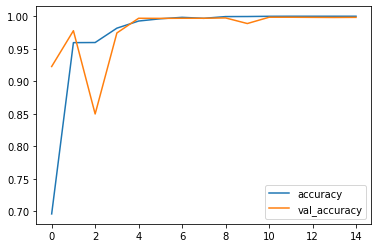

In [ ]:
#Plot train & validation loss
from matplotlib import pyplot
import matplotlib.pyplot as plt

h[["accuracy", "val_accuracy"]].plot()
plt.show()

# Prediction

In [ ]:
#Evaluate on test data
y_pred = transfer_model.predict(test_generator.x)
ypred = np.argmax(y_pred, axis = 1)
print(ypred)

[21 12  6 ... 23 23 23]


In [ ]:
y_pred_cat = []
for x in ypred:
    listOfKeys = list(labels.keys())[list(labels.values()).index(x)]
    if len(listOfKeys) > 1:
        y_pred_cat.append(listOfKeys.lower())
    else:
        y_pred_cat.append(listOfKeys.upper())
print(y_pred_cat)

['V', 'M', 'G', 'N', 'A', 'L', 'X', 'space', 'I', 'S', 'E', 'X', 'O', 'W', 'E', 'V', 'C', 'X', 'M', 'G', 'W', 'V', 'I', 'space', 'D', 'F', 'K', 'W', 'N', 'del', 'F', 'C', 'K', 'H', 'H', 'N', 'G', 'B', 'R', 'G', 'nothing', 'F', 'R', 'V', 'nothing', 'Q', 'O', 'V', 'D', 'C', 'X', 'W', 'A', 'W', 'J', 'Y', 'X', 'A', 'O', 'O', 'C', 'K', 'N', 'H', 'U', 'Y', 'M', 'Q', 'Z', 'nothing', 'I', 'F', 'N', 'P', 'nothing', 'Z', 'W', 'E', 'W', 'A', 'W', 'D', 'Z', 'E', 'P', 'D', 'X', 'F', 'T', 'I', 'W', 'space', 'L', 'U', 'M', 'nothing', 'B', 'K', 'I', 'K', 'H', 'F', 'P', 'W', 'K', 'U', 'Z', 'Z', 'N', 'space', 'Q', 'Z', 'P', 'I', 'M', 'R', 'H', 'Q', 'G', 'L', 'Q', 'R', 'del', 'del', 'H', 'D', 'N', 'D', 'nothing', 'M', 'C', 'V', 'nothing', 'Y', 'space', 'O', 'Q', 'A', 'W', 'I', 'F', 'R', 'O', 'Z', 'del', 'F', 'N', 'del', 'K', 'Q', 'I', 'D', 'L', 'W', 'D', 'J', 'D', 'J', 'C', 'D', 'nothing', 'N', 'U', 'nothing', 'Z', 'Z', 'W', 'Z', 'K', 'J', 'P', 'J', 'U', 'nothing', 'S', 'J', 'del', 'X', 'Y', 'A', 'K', 'D

In [ ]:
output = pd.DataFrame({'Id': ids, 'Prediction': y_pred_cat})
output = output.sort_values(by="Id")
output.to_csv('submission.csv', index=False)
output.sample(10)

,Id,Prediction
10987,1882,C
2130,8999,H
12048,510,R
7214,8889,T
3802,3759,X
4159,6550,M
4203,1487,del
8990,26,Q
8474,1654,I
10377,13042,E
